# Árboles de decisión II
## author: Virginia Ordoño Bernier
## date: february 2024

En este ejercicio se aplica el método **Gradient Boosting** al dataset Iris (clasificación).

Se usará también las técnicas de **GridSearch** y **RandomizedSearch** para la búsqueda de los mejores hiperparámetros. 

### 1. Gestión de datos

#### 1.1 Carga y creación del dataframe

In [10]:
import pandas as pd
import inflection
from sklearn.datasets import load_iris  # Importa load_iris desde sklearn.datasets

# Cargar el conjunto de datos de ejemplo (Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Convertir los datos en DataFrame y cambiar nombre columnas
df_iris = pd.DataFrame(data=X, columns=iris.feature_names)
df_iris.columns = [inflection.underscore(col.replace(' ', '_').replace('(', '').replace(')', '')) for col in df_iris.columns]

# Agrega target
df_iris['target'] = y

df_iris


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 1.2. Correlación de variables

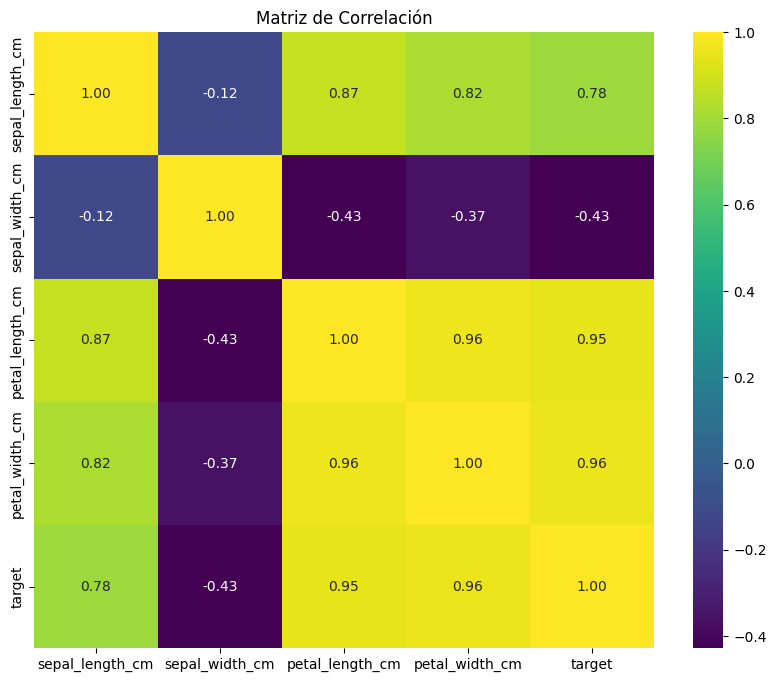

                 sepal_length_cm  sepal_width_cm  petal_length_cm  \
sepal_length_cm             1.00           -0.12             0.87   
sepal_width_cm             -0.12            1.00            -0.43   
petal_length_cm             0.87           -0.43             1.00   
petal_width_cm              0.82           -0.37             0.96   
target                      0.78           -0.43             0.95   

                 petal_width_cm  target  
sepal_length_cm            0.82    0.78  
sepal_width_cm            -0.37   -0.43  
petal_length_cm            0.96    0.95  
petal_width_cm             1.00    0.96  
target                     0.96    1.00  


In [11]:
# Crear una matriz de correlación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_iris.corr()

# Visualizar la matriz de correlación utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Imprimir la matriz de correlación con redondeo a 2 decimales
# print("Matriz de Correlación:")
print(correlation_matrix.round(2))

#### 1.3. Lectura de correlación

Correlación Positiva Fuerte:

La longitud del pétalo (petal_length_cm) muestra una correlación positiva fuerte con la longitud del sépalo (sepal_length_cm) y el ancho del pétalo (petal_width_cm).

El ancho del pétalo (petal_width_cm) también muestra una fuerte correlación positiva con la longitud del pétalo (petal_length_cm) y la longitud del sépalo (sepal_length_cm).
Correlación Negativa Moderada:

La anchura del sépalo (sepal_width_cm) muestra una correlación negativa moderada con la longitud del pétalo (petal_length_cm) y el ancho del pétalo (petal_width_cm).
Correlación con la Variable Objetivo (target):

Todas las características (sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm) muestran una correlación positiva con la variable objetivo (target), siendo la mayor correlación la de petal_width_cm con un valor de 0.96.

### 1.4. Preparación de datos para el entrenamiento

In [12]:
from sklearn.model_selection import train_test_split

X = df_iris.drop('target', axis=1)
y = df_iris['target']

# Divide el DataFrame en conjuntos de entrenamiento y prueba 
train, test = train_test_split(df_iris, test_size=0.33, random_state=42)

# Reseteo de índices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Separación características y etiquetas
X_train = train.drop('target', axis=1)  
y_train = train['target']  
X_test = test.drop('target', axis=1)  
y_test = test['target']

print("Conjunto de entrenamiento:")
print(X_train.head()) 

print("\nConjunto de prueba:")
print(X_test.head())  


Conjunto de entrenamiento:
   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0              5.7             2.9              4.2             1.3
1              7.6             3.0              6.6             2.1
2              5.6             3.0              4.5             1.5
3              5.1             3.5              1.4             0.2
4              7.7             2.8              6.7             2.0

Conjunto de prueba:
   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0              6.1             2.8              4.7             1.2
1              5.7             3.8              1.7             0.3
2              7.7             2.6              6.9             2.3
3              6.0             2.9              4.5             1.5
4              6.8             2.8              4.8             1.4


## 2. Búsqueda de Parametrización con GridSearch y GradientBoosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_dist = {
    "n_estimators": [32, 64, 128],
    "learning_rate": [0.01, 0.05, 0.1, 0.25, 0.5],
    "max_features": ["log2", "sqrt"], # max_features' parameter of GradientBoostingRegressor must be a str among {'sqrt', 'log2'} or None. 
    "loss": ['log_loss'],#The 'loss' parameter of GradientBoostingClassifier must be a str among {'log_loss'} exponential da problemas
    "criterion": ['squared_error', 'friedman_mse'] #  The 'criterion' parameter of GradientBoostingRegressor must be a str among {'squared_error', 'friedman_mse'}
}

# Aplicar GridSearchCV
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=param_dist, cv=5)
grid_gb.fit(X=train.drop(['target'], axis=1), y=train['target'])

# Obtener el mejor estimador
best_gb = grid_gb.best_estimator_

# fit y predecir utilizando el mejor estimador
y_pred = best_gb.predict(X=test.drop(['target'], axis=1))

# Evaluar
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## 3. Búsqueda de Parametrización con RandomizedSearch y GradientBoosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint as sp_randint

param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
                "max_features": ['log2', 'sqrt'], # Number of features to consider at every split (auto no funciona)
                "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
                "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
                "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
                "criterion": ['friedman_mse', 'squared_error'] # 'criterion' parameter of GradientBoostingRegressor must be a str among {'squared_error', 'friedman_mse'}. 
                }

# Aplicar GridSearchCV
grid_gb = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions = param_dist, 
                            n_iter = 100, cv = 5, random_state=0, n_jobs = -1)
grid_gb.fit(X=train.drop(['target'], axis=1), y=train['target'])

# Obtener el mejor estimador
best_gb = grid_gb.best_estimator_

# fit y predecir utilizando el mejor estimador
y_pred = best_gb.predict(X=test.drop(['target'], axis=1))

# Evaluar
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

